# Exploração dados COVID-19

## Em portugal

### Gráficos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_portugal = pd.read_csv("https://raw.githubusercontent.com/jgrocha/covid-pt/master/situacao_epidemiologica.csv")
df_portugal.head()

,id,url,data_relatorio,suspeitos,confirmados,nao_confirmados,aguarda_resultados,recuperados,obitos,em_vigilancia,...,obitos_masculino_80_sup,obitos_feminino_0_9,obitos_feminino_10_19,obitos_feminino_20_29,obitos_feminino_30_39,obitos_feminino_40_49,obitos_feminino_50_59,obitos_feminino_60_69,obitos_feminino_70_79,obitos_feminino_80_sup
0,5,https://covid19.min-saude.pt/wp-content/upload...,2020-03-07,224,21,NaN,47.0,NaN,0,412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,https://covid19.min-saude.pt/wp-content/upload...,2020-03-08,281,30,NaN,56.0,NaN,0,447.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,https://covid19.min-saude.pt/wp-content/upload...,2020-03-10,375,41,NaN,83.0,NaN,0,667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,https://covid19.min-saude.pt/wp-content/upload...,2020-03-13,1308,112,NaN,172.0,NaN,0,5674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,https://covid19.min-saude.pt/wp-content/upload...,2020-03-14,1704,169,NaN,126.0,1.0,0,5011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
sorted_df_portugal = df_portugal.sort_values(by=['data_relatorio'])

ageRange = [0,9]
confirmed_men = death_men = 0
confirmed_women = death_women = 0

for i in range(8):
    confirmed_men += sorted_df_portugal["confirmados_masculino_"+ \
                                        str(ageRange[0]) + "_" + str(ageRange[1])]
    confirmed_women += sorted_df_portugal["confirmados_feminino_" + \
                                          str(ageRange[0]) + "_" + str(ageRange[1])]
    death_men += sorted_df_portugal["obitos_masculino_"+ \
                                        str(ageRange[0]) + "_" + str(ageRange[1])]
    death_women += sorted_df_portugal["obitos_feminino_" + \
                                          str(ageRange[0]) + "_" + str(ageRange[1])]

    if ageRange[1] <= 20:
        confirmed_young = confirmed_men + confirmed_women
        death_young = death_men + death_women
    elif ageRange[1] <= 50:
        confirmed_adult = (confirmed_men + confirmed_women) - confirmed_young
        death_adult = (death_men + death_women) - death_young

    ageRange = [x+10 for x in ageRange]

confirmed_men += sorted_df_portugal["confirmados_masculino_80_sup"]
confirmed_women += sorted_df_portugal["confirmados_feminino_80_sup"]
confirmed_senior = (confirmed_men + confirmed_women) - (confirmed_adult +  confirmed_young)

death_men += sorted_df_portugal["confirmados_masculino_80_sup"]
death_women += sorted_df_portugal["confirmados_feminino_80_sup"]
death_senior = (death_men + death_women) - (death_adult +  death_young)

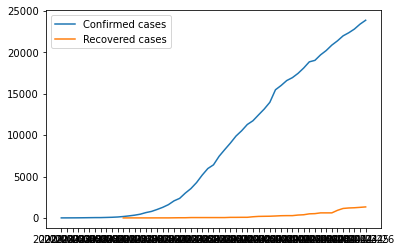

In [3]:
x = sorted_df_portugal.data_relatorio
y_confirmed = sorted_df_portugal.confirmados
y_recovered = sorted_df_portugal.recuperados

plt.plot(x, y_confirmed, label="Confirmed cases")
plt.plot(x, y_recovered, label="Recovered cases")

plt.legend(loc="best") #show legend
plt.show()

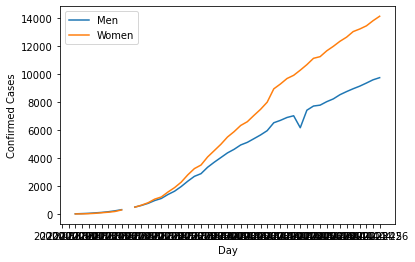

In [4]:
y_confirmed_men = confirmed_men
y_confirmed_women = confirmed_women

plt.plot(x, y_confirmed_men, label="Men")
plt.plot(x, y_confirmed_women, label="Women")

plt.xlabel("Day")
plt.ylabel("Confirmed Cases")

plt.legend(loc="best")
plt.show()

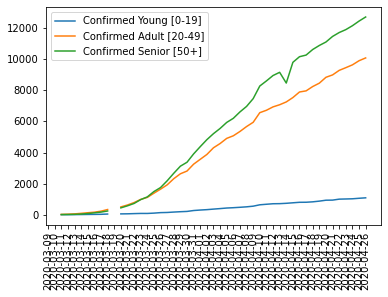

In [5]:
y_confirmed_young = confirmed_young
y_confirmed_adult = confirmed_adult
y_confirmed_senior = confirmed_senior

plt.plot(x, y_confirmed_young, label="Confirmed Young [0-19]")
plt.plot(x, y_confirmed_adult, label="Confirmed Adult [20-49]")
plt.plot(x, y_confirmed_senior, label="Confirmed Senior [50+]")

plt.xticks(rotation=90)
plt.legend(loc="best")

plt.show()

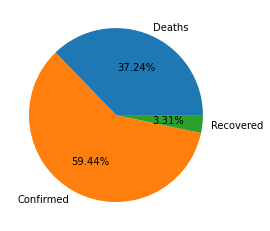

In [6]:
y_deaths = df_portugal.obitos.sum()
y_confirmed = sorted_df_portugal.confirmados.iat[-1]
y_recovered = sorted_df_portugal.recuperados.iat[-1]

data = [y_deaths, y_confirmed, y_recovered]
dataLabels = ["Deaths", "Confirmed", "Recovered"]
plt.pie(data, labels=dataLabels, autopct='%.2f%%')

plt.show()

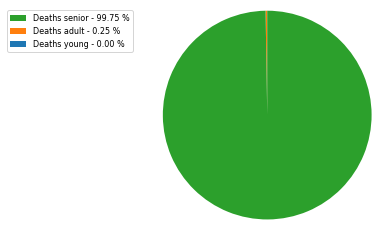

In [7]:
import numpy as np

y_death_young = death_young.iat[-1]
y_death_adult = death_adult.iat[-1]
y_death_senior = death_senior.iat[-1]

data = np.array([y_death_young, y_death_adult, y_death_senior])
dataLabels = ["Deaths young", "Deaths adult", "Deaths senior"]

porcent = 100*data/sum(data)

patches, texts = plt.pie(data, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(dataLabels, porcent)]

patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.show()

## Mapas

In [8]:
import os
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
from qgis.core import *

from qgis.PyQt.QtGui import QColor
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		
Prefix:		/usr
Plugin Path:		/usr/lib64/qgis
Package Data Path:	/usr/share/qgis
Active Theme Name:	
Active Theme Path:	/usr/share/qgis/resources/themes//icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/share/qgis/svg/
		/home/andre/.local/share/profiles/default/svg/
User DB Path:	/usr/share/qgis/resources/qgis.db
Auth DB Path:	/home/andre/.local/share/profiles/default/qgis-auth.db



In [9]:
import urllib.request

#urllib.request.urlretrieve("https://github.com/jgrocha/covid-pt/raw/master/covid-pt-latest.gpkg", "covid-pt-latest.gpkg")
urllib.request.urlretrieve("https://github.com/jgrocha/covid-pt/raw/master/covid-pt-2020-04-24.gpkg", "covid-pt-latest.gpkg")

covid_pt_gpkg = "covid-pt-latest.gpkg"
conn = ogr.Open(covid_pt_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_pt_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))


Layer concelho loaded
Layer distrito loaded
Layer raa_central_concelho loaded
Layer raa_central_ilha loaded
Layer raa_ocidental_concelho loaded
Layer raa_ocidental_ilha loaded
Layer raa_oriental_concelho loaded
Layer raa_oriental_ilha loaded
Layer ram_concelho loaded
Layer ram_ilha loaded
Layer layer_styles loaded
Layer confirmados_concelho loaded
Layer confirmados_distrito_ilha loaded
Layer situacao_epidemiologica loaded


In [10]:
distrito_layer = QgsProject.instance().mapLayersByName("distrito")[0]
concelho_layer = QgsProject.instance().mapLayersByName("concelho")[0]

In [11]:
for c in concelho_layer.getFeatures():
        print("Em {} há {} caso(s) confirmados".format(c["concelho"], c["confirmados_concelho_mais_recente"]))

Em ÁGUEDA há 42 caso(s) confirmados
Em ALBERGARIA-A-VELHA há 61 caso(s) confirmados
Em ANADIA há 28 caso(s) confirmados
Em AROUCA há 30 caso(s) confirmados
Em AVEIRO há 243 caso(s) confirmados
Em CASTELO DE PAIVA há 10 caso(s) confirmados
Em ESPINHO há 63 caso(s) confirmados
Em ESTARREJA há 52 caso(s) confirmados
Em SANTA MARIA DA FEIRA há 356 caso(s) confirmados
Em ÍLHAVO há 95 caso(s) confirmados
Em MEALHADA há 14 caso(s) confirmados
Em MURTOSA há 8 caso(s) confirmados
Em OLIVEIRA DE AZEMÉIS há 149 caso(s) confirmados
Em OLIVEIRA DO BAIRRO há 17 caso(s) confirmados
Em OVAR há 534 caso(s) confirmados
Em SÃO JOÃO DA MADEIRA há 55 caso(s) confirmados
Em SEVER DO VOUGA há 29 caso(s) confirmados
Em VAGOS há 17 caso(s) confirmados
Em VALE DE CAMBRA há 85 caso(s) confirmados
Em ALJUSTREL há NULL caso(s) confirmados
Em ALMODÔVAR há 3 caso(s) confirmados
Em ALVITO há NULL caso(s) confirmados
Em BARRANCOS há NULL caso(s) confirmados
Em BEJA há 9 caso(s) confirmados
Em CASTRO VERDE há NULL caso

In [12]:
expr_sem_casos = QgsExpression( " \"confirmados_concelho_20/04/2020\" IS NULL " )
virgens = list(concelho_layer.getFeatures( QgsFeatureRequest( expr_sem_casos ) ))
for c in virgens:
        print("Em {} não há pelos menos 3 casos confirmados".format(c["concelho"]))

Em ALJUSTREL não há pelos menos 3 casos confirmados
Em ALVITO não há pelos menos 3 casos confirmados
Em BARRANCOS não há pelos menos 3 casos confirmados
Em CASTRO VERDE não há pelos menos 3 casos confirmados
Em CUBA não há pelos menos 3 casos confirmados
Em FERREIRA DO ALENTEJO não há pelos menos 3 casos confirmados
Em MÉRTOLA não há pelos menos 3 casos confirmados
Em ODEMIRA não há pelos menos 3 casos confirmados
Em OURIQUE não há pelos menos 3 casos confirmados
Em VIDIGUEIRA não há pelos menos 3 casos confirmados
Em FREIXO DE ESPADA À CINTA não há pelos menos 3 casos confirmados
Em MOGADOURO não há pelos menos 3 casos confirmados
Em BELMONTE não há pelos menos 3 casos confirmados
Em FUNDÃO não há pelos menos 3 casos confirmados
Em IDANHA-A-NOVA não há pelos menos 3 casos confirmados
Em OLEIROS não há pelos menos 3 casos confirmados
Em PENAMACOR não há pelos menos 3 casos confirmados
Em PROENÇA-A-NOVA não há pelos menos 3 casos confirmados
Em VILA DE REI não há pelos menos 3 casos con

In [13]:
def renderMap(layer):
    xt = layer.extent()
    width  = 400
    height = int(width*xt.height()/xt.width())
    print("Gerar mapa com {} por {}".format(width, height))

    options = QgsMapSettings()
    options.setLayers([layer])
    options.setBackgroundColor(QColor(255, 255, 255))
    options.setOutputSize(QSize(width, height))
    options.setExtent(xt)

    render = QgsMapRendererParallelJob(options)
    render.start()
    render.waitForFinished()

    image = render.renderedImage()
    return image

In [14]:
from IPython.display import display, Image

def preview_map(image):
    imgbuf= QBuffer()
    imgbuf.open( QIODevice.ReadWrite )
    image.save( imgbuf,"PNG" )
    display(Image( imgbuf.data() ))

Gerar mapa com 400 por 819


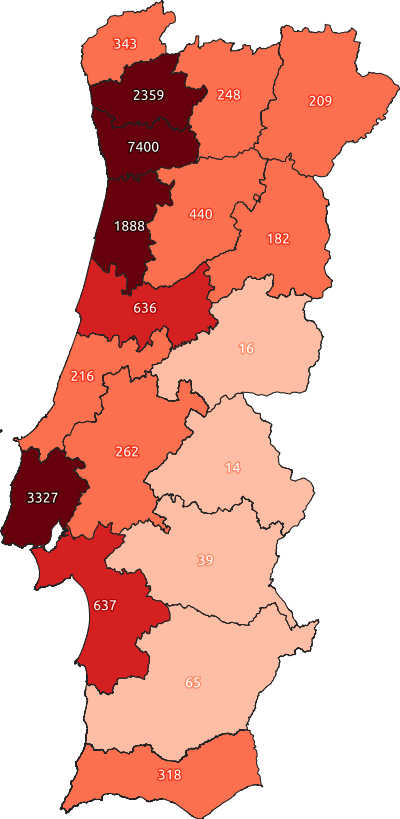

In [15]:
image = renderMap(distrito_layer)
preview_map(image)

Gerar mapa com 400 por 819


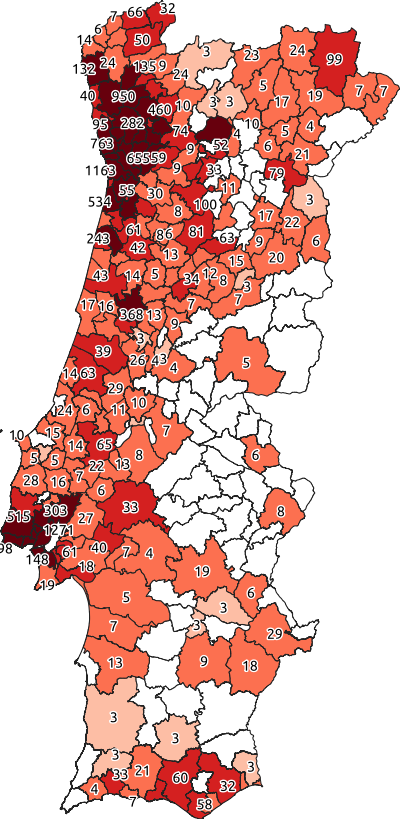

In [16]:
image = renderMap(concelho_layer)
preview_map(image)